<a href="https://colab.research.google.com/github/bomiiisong/DeepLearning-with-Python/blob/master/DNN/Batch_Normalization%26Combine_Model_for_Overfitting_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNN Model with Batch Normalization

* MNIST Datasets

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Ⅰ. Import Packages & Load datasets

* import tensorflow & version check

In [ ]:
import tensorflow as tf

tf.__version__

'2.4.1'

* GPU 사용 여부 Check

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

* import keras & version check

In [ ]:
import keras

keras.__version__

'2.4.3'

* Load MNIST Datasets

In [ ]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


* train data shape check

In [ ]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)
60000
[5 0 4 1 9]


* test data shape check

In [ ]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[7 2 1 0 4]


* data visualization

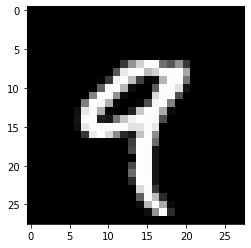

In [ ]:
import matplotlib.pyplot as plt

digit = X_train[4]
plt.imshow(digit, cmap='gray')
plt.show()

In [ ]:
import numpy as np
np.set_printoptions(linewidth=150)

print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

## Ⅱ. Data Preprocessing

> ### 1. Input data reshape to 1D array

In [ ]:
X_train = X_train.reshape((60000, 28*28))
X_test = X_test.reshape((10000, 28*28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

> ### 2. Input data Normalization

In [ ]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [ ]:
print(X_train[4])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

> ### 3. Label data One Hot Encoding

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Ⅲ. Modeling

*  Batch Nomoalization : 활성화 함수의 입력값에 정규화 과정을 수행


In [ ]:
from keras import models
from keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Dense(256))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(10, activation='softmax'))

In [ ]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 538,890
Trainable params: 537,354
Non-trainable params: 1,536
______________________________________________

In [ ]:
mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
%%time

Hist_mnist = mnist.fit(X_train, y_train, epochs=100,
                       batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 5s 5ms/step - loss: 0.3006 - accuracy: 0.9105 - val_loss: 0.1156 - val_accuracy: 0.9675
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0686 - accuracy: 0.9789 - val_loss: 0.0989 - val_accuracy: 0.9718
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0444 - accuracy: 0.9861 - val_loss: 0.0870 - val_accuracy: 0.9768
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0269 - accuracy: 0.9921 - val_loss: 0.0947 - val_accuracy: 0.9748
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.0853 - val_accuracy: 0.9793
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0.0933 - val_accuracy: 0.9784
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0131 - accuracy: 0.9957 - val_loss: 0.0869 - val_accuracy: 0.9789

* Loss Visualization

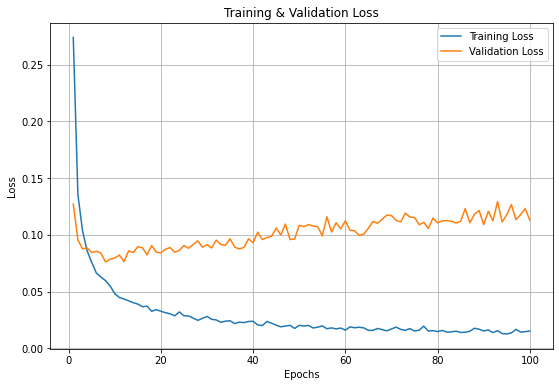

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

#### Model Loss & Accuracy check

In [ ]:
loss, accuracy = mnist.evaluate(X_test, y_test)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.2168 - accuracy: 0.9761
Loss = 0.21679
Accuracy = 0.97610


## Ⅳ. Overfitting 처리 결합 모델

> ### 1. Dropout + Batch_Nomalization

In [ ]:
from keras import models
from keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
mnist.add(layers.Dropout(0.4))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Dense(256))
mnist.add(layers.Dropout(0.2))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(10, activation='softmax'))

In [ ]:
mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
%%time

Hist_mnist = mnist.fit(X_train, y_train, epochs=100,
                       batch_size=128, validation_split=0.2)

#### Model Loss & Accuracy check

In [ ]:
loss, accuracy = mnist.evaluate(X_test, y_test)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1030 - accuracy: 0.9843
Loss = 0.10299
Accuracy = 0.98430


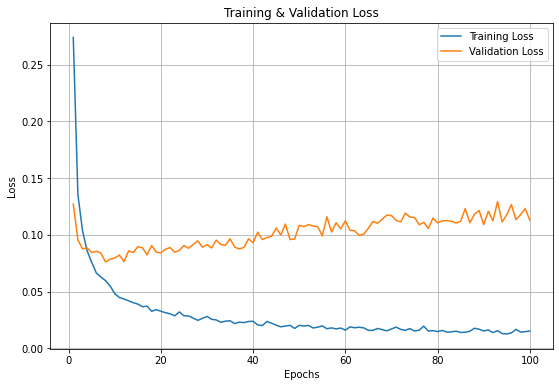

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ### 2. Dropout + L2

In [ ]:
from keras import models
from keras import layers
from keras import regularizers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation='relu', kernel_regularizer='l2', input_shape=(28*28,)))
mnist.add(layers.Dropout(0.4))
# mnist.add(layers.BatchNormalization())
mnist.add(layers.Dense(256, activation='relu'))
mnist.add(layers.Dropout(0.2))
# mnist.add(layers.BatchNormalization())
# mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(10, activation='softmax'))

In [ ]:
mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
%%time

Hist_mnist = mnist.fit(X_train, y_train, epochs=100,
                       batch_size=128, validation_split=0.2)

#### Model Loss & Accuracy Check

In [ ]:
loss, accuracy = mnist.evaluate(X_test, y_test)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1913 - accuracy: 0.9716
Loss = 0.19132
Accuracy = 0.97160


> ### 3. Batch normalization + L2

In [ ]:
from keras import models
from keras import layers
from keras import regularizers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation='relu', kernel_regularizer='l2', input_shape=(28*28,)))
# mnist.add(layers.Dropout(0.4))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Dense(256))
# mnist.add(layers.Dropout(0.2))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(10, activation='softmax'))

In [ ]:
mnist.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
%%time

Hist_mnist = mnist.fit(X_train, y_train, epochs=100,
                       batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.1022 - accuracy: 0.9029 - val_loss: 0.3796 - val_accuracy: 0.9465
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 0.2713 - accuracy: 0.9585 - val_loss: 0.2814 - val_accuracy: 0.9497
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.2371 - accuracy: 0.9597 - val_loss: 0.2731 - val_accuracy: 0.9523
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2144 - accuracy: 0.9652 - val_loss: 0.2597 - val_accuracy: 0.9524
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1989 - accuracy: 0.9685 - val_loss: 0.2526 - val_accuracy: 0.9547
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1970 - accuracy: 0.9679 - val_loss: 0.2462 - val_accuracy: 0.9484
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1849 - accuracy: 0.9690 - val_loss: 0.2406 - val_accuracy: 0.9561

#### Model Loss & Accuracy Check

In [ ]:
loss, accuracy = mnist.evaluate(X_test, y_test)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1558 - accuracy: 0.9716
Loss = 0.15584
Accuracy = 0.97160


## Ⅴ. 정리

* Batch Nomalization + Dropout Model 성능이 가장 우수함